# DAY_067

***
### [作業目標]
- 使用CIFAR100, 數據集變大的影響
    
### [作業重點]
- 了解 CIFAR100 跟 CIFAR10 數據及差異

### [參考資料]
- [Keras: The Python Deep Learning library](https://github.com/keras-team/keras/)

- [Keras dataset](https://keras.io/datasets/)

- [Predicting Boston House Prices](https://www.kaggle.com/sagarnildass/predicting-boston-house-prices)

### [其餘資訊]

## Imagenet

  - Imagenet數據集有1400多萬幅圖片，涵蓋2萬多個類別；其中有超過百萬的圖片有明確的類別標註和圖像中物體位置的標註，具體信息如下：

     (1）Total number of non-empty synsets : 21841 

     (2）Total number of images: 14,197,122 

     (3）Number of images with bounding box annotations: 1,034,908 

     (4）Number of synsets with SIFT features: 1000 

     (5）Number of images with SIFT features: 1.2 million   
   

   - Imagenet數據集是目前深度學習圖像領域應用得非常多的一個領域，關於圖像分類、定位、檢測等研究工作大多基於此數據集展開。Imagenet數據集文檔詳細，有專門的團隊維護，使用非常方便，在計算機視覺領域研究論文中應用非常廣，幾乎成為了目前深度學習圖像領域算法性能檢驗的“標準”數據集。數據集大小：~1TB（ILSVRC2016比賽全部數據）下載地址：http://www.image-net.org/about-stats


## COCO

  - COCO(Common Objects in Context)是一個新的圖像識別、分割和圖像語義數據集，它有如下特點：

    (1）Object segmentation 

    (2）Recognition in Context 

    (3）Multiple objects per image 

    (4）More than 300,000 images 

    (5）More than 2 Million instances 

    (6）80 object categories 

    (7）5 captions per image 

    (8）Keypoints on 100,000 people   
   
   
  - COCO數據集由微軟贊助，其對於圖像的標註信息不僅有類別、位置信息，還有對圖像的語義文本描述，COCO數據集的開源使得近兩三年來圖像分割語義理解取得了巨大的進展，也幾乎成為了圖像語義理解算法性能評價的“標準”數據集。   
   
   
  - Google開源的開源了圖說生成模型show and tell就是在此數據集上測試的，想玩的可以下下來試試。數據集大小：~40GB 下載地址：http://mscoco.org/

In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# 資料準備

In [2]:
(x_train_fine, y_train_fine), (x_test_fine, y_test_fine) = cifar100.load_data(label_mode = 'fine')
(x_train_coar, y_train_coar), (x_test_coar, y_test_coar) = cifar100.load_data(label_mode = 'coarse')

- CIFAR100 has two label mode, 'fine' and 'coarse'  100 and 20 classes respectively

In [3]:
# Check one of datasets data shape
print(f'x_train_fine: {x_train_fine.shape}')
print(f'x_test_fine : {x_test_fine.shape}')

x_train_fine: (50000, 32, 32, 3)
x_test_fine : (10000, 32, 32, 3)


# 檢視資料

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Reference to https://corochann.com/cifar-10-cifar-100-dataset-introduction-1258.html

CIFAR10_LABELS_LIST = [
    'airplane', 
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

CIFAR100_LABELS_LIST_COARSE = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices',
    'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes',
    'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
    'trees', 'vehicles 1', 'vehicles 2'
]

CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [6]:
#宣告一個影像標記的函數
def plot_images(images, labels, prediction, idx, dict, num=10):
    
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num > 25: num = 25 
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap = 'binary')
                
        title = str(i) + ' : ' + dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' + dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([])
        ax.set_yticks([])        
        idx+=1 
    plt.show()

# Label Mode : Fine

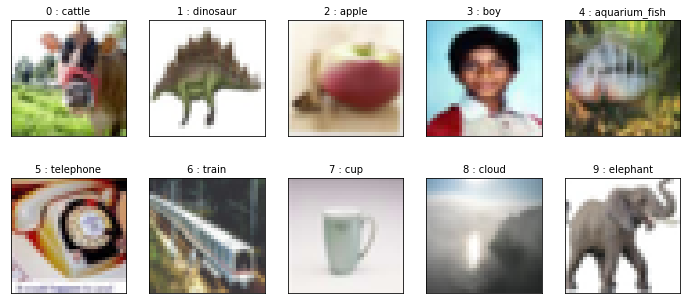

In [7]:
plot_images(x_train_fine, y_train_fine, [], 0, CIFAR100_LABELS_LIST)

# Label Mode : Coarse

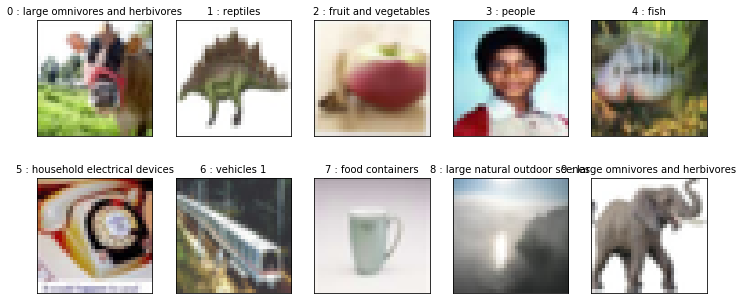

In [8]:
plot_images(x_train_coar, y_train_coar, [], 0, CIFAR100_LABELS_LIST_COARSE)

# 資料轉換

In [9]:
x_train_fine[0][0][0]

array([255, 255, 255], dtype=uint8)

In [10]:
# Normalization
x_train_fine_normal = x_train_fine.astype('float32') / 255.0
x_test_fine_normal = x_test_fine.astype('float32') / 255.0

In [11]:
x_train_fine_normal[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [12]:
print(f'y_train_fine: {y_train_fine.shape}')
print(f'y_test_fine : {y_test_fine.shape}')

y_train_fine: (50000, 1)
y_test_fine : (10000, 1)


In [13]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train_fine)
y_test_onehot = np_utils.to_categorical(y_test_fine)

In [14]:
print(f'y_train_onehot: {y_train_onehot.shape}')
print(f'y_test_onehot : {y_test_onehot.shape}')

y_train_onehot: (50000, 100)
y_test_onehot : (10000, 100)


In [15]:
y_train_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.